# Average IQ Per Country Analysis 

Dataset Source: https://www.kaggle.com/datasets/mlippo/average-global-iq-per-country-with-other-stats/data?select=avgIQpercountry.csv

### Introduction

The ‘avgIQpercountry.csv’ dataset provides a fascinating look at the average IQ scores of different countries, along with other related statistics such as literacy rates, Nobel Prizes won, Human Development Index (HDI) for 2021, mean years of schooling in 2021, Gross National Income (GNI) for 2021, and population estimates for 2023. This rich dataset allows for a variety of analyses, from exploring the distribution of IQ scores across continents to investigating the relationship between IQ and other factors like literacy rate and GNI.

### Import Libraries 

In [70]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Import Dataset

In [2]:
df = pd.read_csv("IQ.csv")
df

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513
1,2,Taiwan,106.47,Asia,0.96,4,NaN,NaN,NaN,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,8,0.768,7.6,17504.0,1425671352
...,...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,2,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,2,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0,0.477,4.6,1622.0,8791092


In [5]:
print(df.columns)

Index(['Rank', 'Country', 'Average IQ', 'Continent', 'Literacy Rate',
       'Nobel Prices', 'HDI (2021)', 'Mean years of schooling - 2021',
       ' GNI - 2021', 'Population - 2023'],
      dtype='object')


In [16]:
# Display the summary statistics of the dataframe
print(df.describe())

             Rank  Average IQ  Literacy Rate  Nobel Prices  HDI (2021)  \
count  193.000000  193.000000     193.000000    193.000000  193.000000   
mean    97.000000   82.047927       0.864249      5.922280    0.724123   
std     55.858452   13.336117       0.180262     31.971328    0.147086   
min      1.000000   42.990000       0.190000      0.000000    0.385000   
25%     49.000000   74.330000       0.800000      0.000000    0.615000   
50%     97.000000   82.240000       0.950000      0.000000    0.727000   
75%    145.000000   91.600000       0.990000      1.000000    0.831000   
max    193.000000  106.480000       1.000000    400.000000    0.962000   

       Mean years of schooling - 2021     GNI - 2021  
count                      193.000000     193.000000  
mean                         9.028492   20811.798883  
std                          3.069443   21337.269452  
min                          2.100000     732.000000  
25%                          7.000000    4811.000000  
50%

### Data Cleaning 

In [3]:
# Check for missing values
print(df.isnull().sum())

Rank                               0
Country                            0
Average IQ                         0
Continent                          0
Literacy Rate                      0
Nobel Prices                       0
HDI (2021)                        14
Mean years of schooling - 2021    14
 GNI - 2021                       14
Population - 2023                  0
dtype: int64


In [11]:
# Resolve missing values
mean_hdi = df['HDI (2021)'].mean()
df['HDI (2021)'].fillna(mean_hdi, inplace=True)

mean_schooling = df['Mean years of schooling - 2021'].mean()
df['Mean years of schooling - 2021'].fillna(mean_schooling, inplace=True)

mean_gni = df[' GNI - 2021'].mean()
df[' GNI - 2021'].fillna(mean_gni, inplace=True)

In [12]:
# Check for missing values
print(df.isnull().sum())

Rank                              0
Country                           0
Average IQ                        0
Continent                         0
Literacy Rate                     0
Nobel Prices                      0
HDI (2021)                        0
Mean years of schooling - 2021    0
 GNI - 2021                       0
Population - 2023                 0
dtype: int64


In [13]:
# Check if there are any duplicates
print(df.duplicated().sum())

0


In [14]:
# Check the data types of each column
print(df.dtypes)

Rank                                int64
Country                            object
Average IQ                        float64
Continent                          object
Literacy Rate                     float64
Nobel Prices                        int64
HDI (2021)                        float64
Mean years of schooling - 2021    float64
 GNI - 2021                       float64
Population - 2023                  object
dtype: object


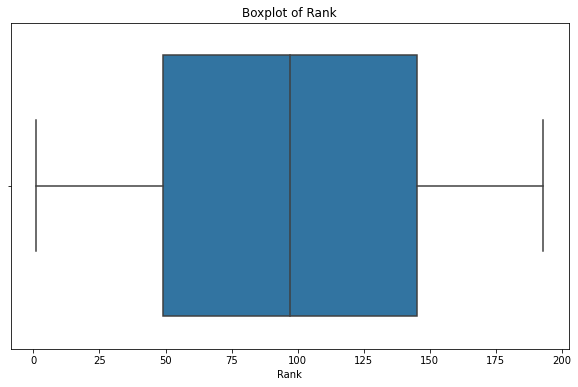

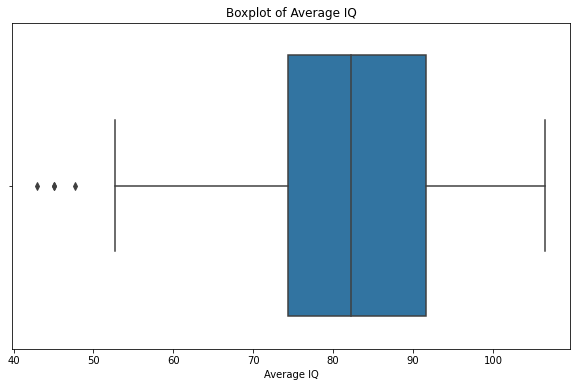

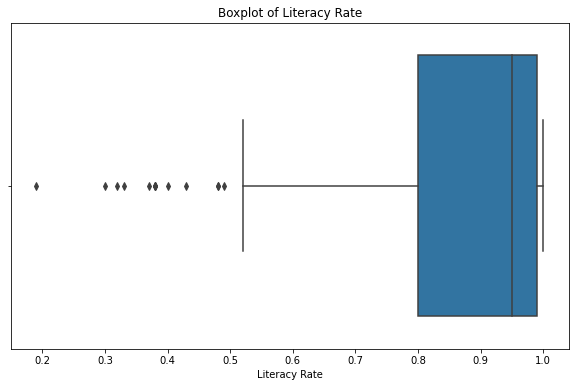

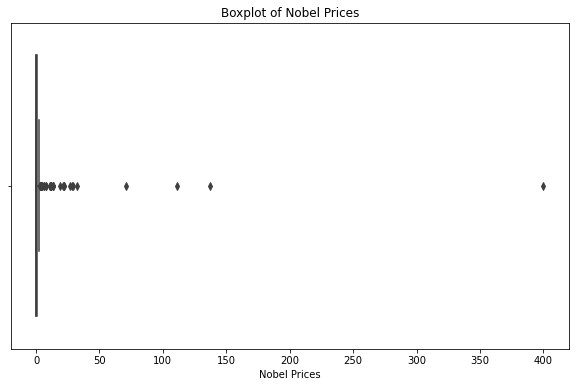

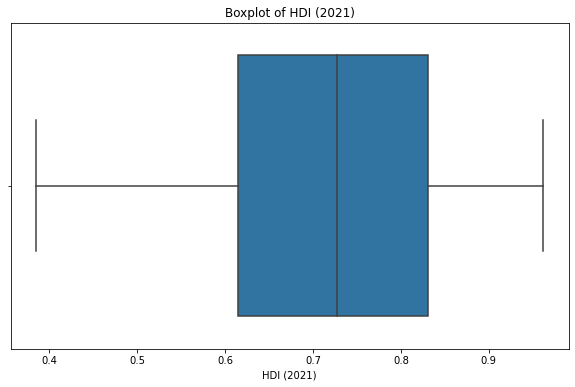

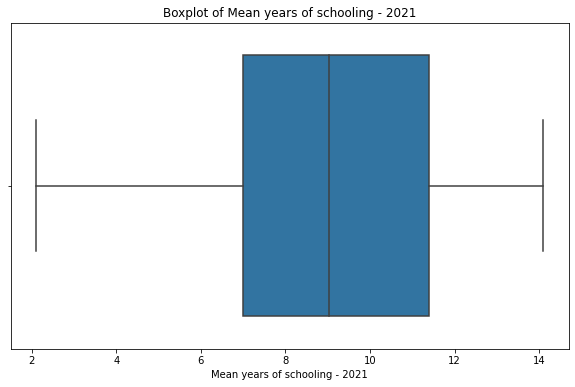

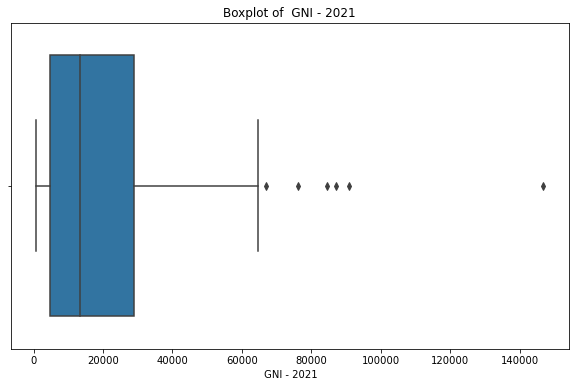

In [22]:
# Outlier Detection
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Based on that boxplot, there are outliers on 4 variables 

### EDA

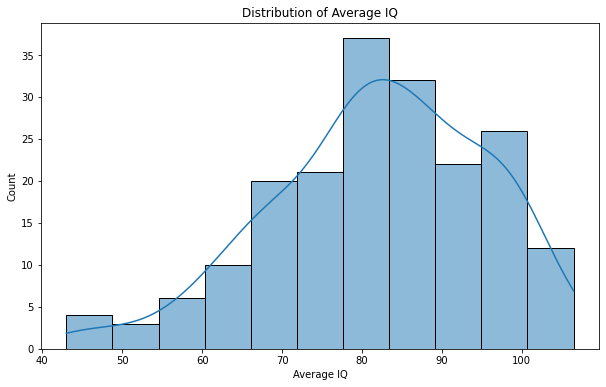

In [17]:
# Plotting the distribution of 'Average IQ'
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Average IQ', kde=True)
plt.title('Distribution of Average IQ')
plt.show()

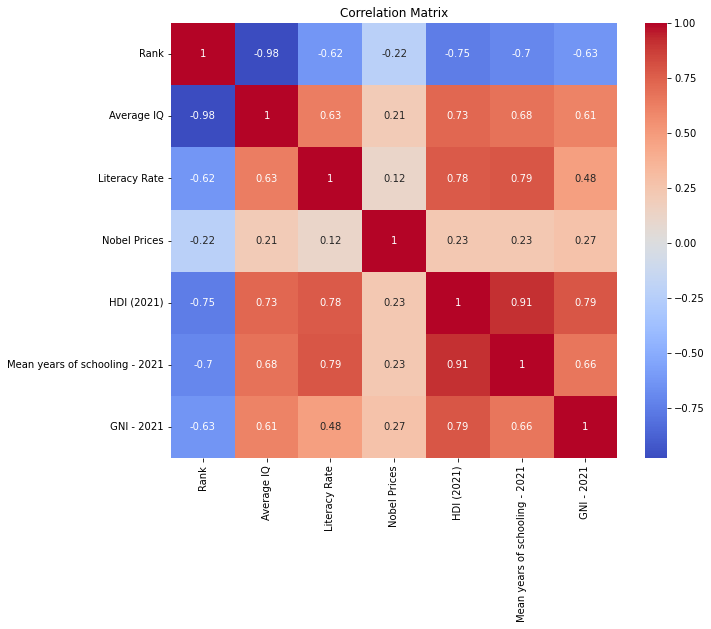

In [18]:
# Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

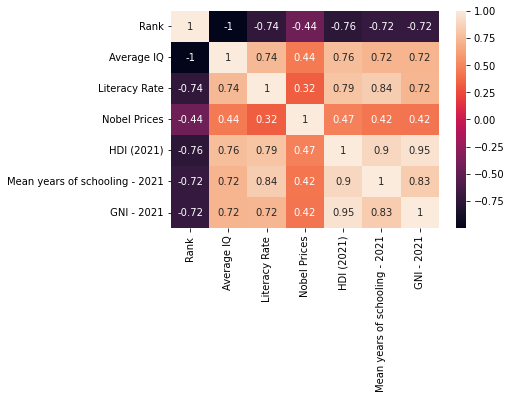

In [21]:
sns.heatmap(df.corr(method = 'spearman'), annot = True)

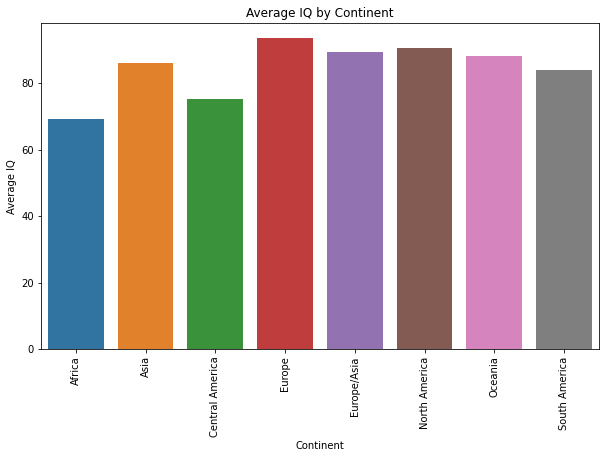

In [31]:
# Calculate the average IQ by continent
avg_iq_by_continent = df.groupby('Continent')['Average IQ'].mean()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_iq_by_continent.index, y=avg_iq_by_continent.values)
plt.title('Average IQ by Continent')
plt.xlabel('Continent')
plt.ylabel('Average IQ')
plt.xticks(rotation=90)
plt.show()

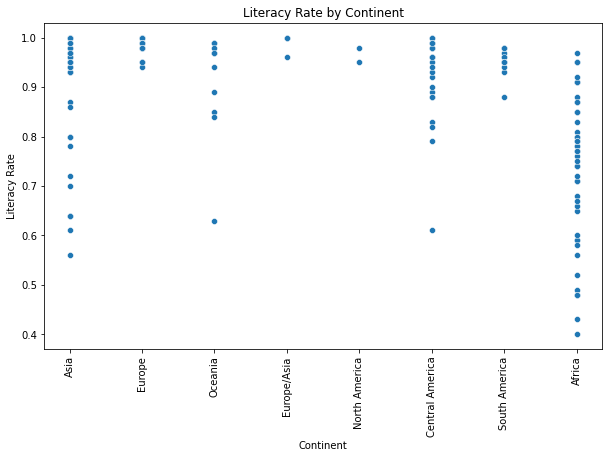

In [33]:
#Literacy Rate by Continent 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Continent', y='Literacy Rate')
plt.title('Literacy Rate by Continent')
plt.xlabel('Continent')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.show()

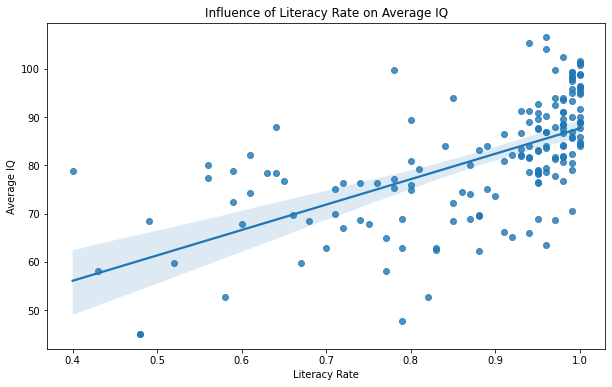

In [35]:
#The Influence of literacy rate with IQ 
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Literacy Rate', y='Average IQ')
plt.title('Influence of Literacy Rate on Average IQ')
plt.xlabel('Literacy Rate')
plt.ylabel('Average IQ')
plt.show()

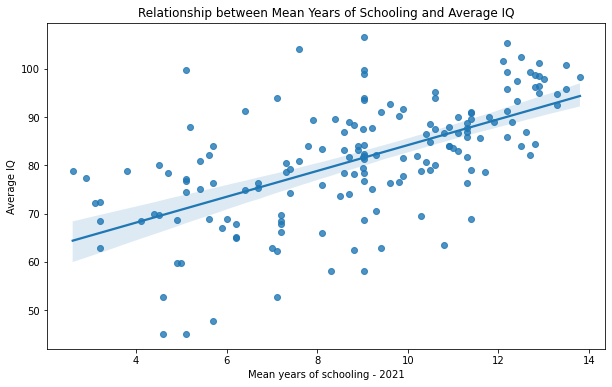

In [36]:
#The relationship between years of schooling and average IQ
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Mean years of schooling - 2021', y='Average IQ')
plt.title('Relationship between Mean Years of Schooling and Average IQ')
plt.xlabel('Mean years of schooling - 2021')
plt.ylabel('Average IQ')
plt.show()

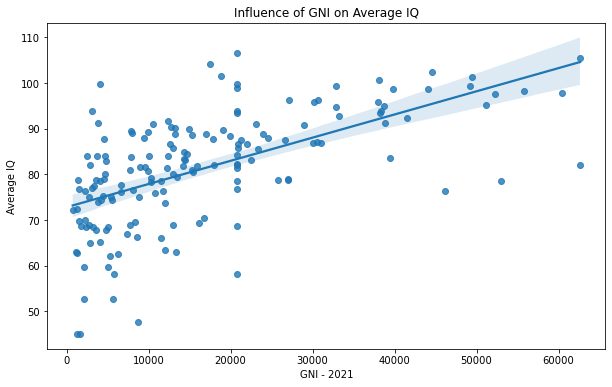

In [42]:
#The Influence of GNI on Average IQ
plt.figure(figsize=(10,6))
sns.regplot(data=df, x=' GNI - 2021', y='Average IQ')
plt.title('Influence of GNI on Average IQ')
plt.xlabel('GNI - 2021')
plt.ylabel('Average IQ')
plt.show()

### Regression 

In [50]:
# Define the predictor variables and the target variable
X = df[['Literacy Rate', ' GNI - 2021']]
y = df['Average IQ']

In [51]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Create and train the models
models = [LinearRegression(), DecisionTreeRegressor(), SVR()]
for model in models:
    model.fit(X_train, y_train)
    print(f'{model.__class__.__name__} trained.')

LinearRegression trained.
DecisionTreeRegressor trained.
SVR trained.


In [53]:
# Make predictions on the test set
for model in models:
    y_pred = model.predict(X_test)
    print(f'Predictions with {model.__class__.__name__}: {y_pred}')

Predictions with LinearRegression: [83.21272259 93.48404441 69.94653654 88.97929883 83.71355846 89.47109311
 74.9549252  84.7451825  87.20275513 80.53730191 92.62443091 81.81805501
 99.23770257 86.65273242 86.31790272 92.73274059 79.4281298  82.75372793
 71.23877898 96.73769926 83.81645325 89.2903705  93.18656    95.79152606
 84.68803537 70.49847505 87.55149196 89.84162968 74.68150853 67.48655628
 76.85091809 86.98756213 84.68466864]
Predictions with DecisionTreeRegressor: [ 90.29       102.35        76.79        86.8         90.29
  86.8         47.72       104.1         87.58        75.08
 100.72        83.96        98.26        85.085       83.30666667
  87.89        75.08        66.03        68.77        98.26
  78.49        95.75        94.92        98.57        85.86
  76.42        87.58        95.75        74.95        76.42
  93.92        98.82        80.92      ]
Predictions with SVR: [81.7400907  92.33352706 76.93992653 91.074298   82.08270796 91.84844637
 77.90909352 84.9136

From the predictions made by the three models (Linear Regression, Decision Tree Regressor, and Support Vector Regression), we can see that each model has a different prediction for the ‘Average IQ’ based on the ‘Literacy Rate’ and ‘GNI - 2021’.

The Linear Regression model assumes a linear relationship between the predictor variables and the target variable. It tries to find a straight line that best fits the data.

The Decision Tree Regressor model makes predictions by learning simple decision rules from the data. It is a type of non-linear regression that can capture more complex patterns in the data.

The Support Vector Regression model tries to find a function that has at most ε deviation from the actually obtained targets for all the training data, and at the same time is as flat as possible.

### Classification

In [55]:
# Define the predictor variables and the target variable
X = df[['Average IQ', ' GNI - 2021']]
y = df['Continent']

In [56]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Create and train the models
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]
for model in models:
    model.fit(X_train, y_train)
    print(f'{model.__class__.__name__} trained.')

LogisticRegression trained.
DecisionTreeClassifier trained.
RandomForestClassifier trained.
SVC trained.


C:\Users\mades\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Make predictions on the test set
for model in models:
    y_pred = model.predict(X_test)
    print(f'Predictions with {model.__class__.__name__}: {y_pred}')

Predictions with LogisticRegression: ['Asia' 'Europe' 'Africa' 'Asia' 'Asia' 'Europe' 'Africa' 'Asia' 'Asia'
 'Asia' 'Europe' 'Asia' 'Europe' 'Asia' 'Asia' 'Europe' 'Asia' 'Asia'
 'Africa' 'Europe' 'Asia' 'Asia' 'Europe' 'Europe' 'Asia' 'Africa' 'Asia'
 'Asia' 'Africa' 'Africa' 'Africa' 'Asia' 'Asia']
Predictions with DecisionTreeClassifier: ['Africa' 'Central America' 'Africa' 'Europe/Asia' 'Africa' 'Europe'
 'Central America' 'Central America' 'Asia' 'Central America' 'Europe'
 'Asia' 'Europe' 'Central America' 'North America' 'Europe' 'Africa'
 'South America' 'Africa' 'Europe' 'Central America' 'Europe' 'Oceania'
 'Europe' 'South America' 'Africa' 'Asia' 'Europe/Asia' 'Africa' 'Africa'
 'Africa' 'Central America' 'South America']
Predictions with RandomForestClassifier: ['Africa' 'Asia' 'Africa' 'Europe/Asia' 'Africa' 'Europe'
 'Central America' 'Central America' 'Asia' 'Central America' 'Europe'
 'Asia' 'Europe' 'Central America' 'North America' 'Europe' 'Africa'
 'Asia' 'Africa' 

From the predictions made by the four models (Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Support Vector Classifier), we can see that each model has a different prediction for the ‘Continent’ based on the ‘Average IQ’ and ‘GNI - 2021’.

The Logistic Regression model is a simple and fast model, but it may not capture complex relationships between features and the target variable.

The Decision Tree Classifier and Random Forest Classifier are more flexible models that can capture non-linear relationships, but they can also overfit to the training data if not properly tuned.

The Support Vector Classifier tries to find the best hyperplane that separates different classes, and it can handle high dimensional data well.

In [63]:
# Define the features
features = df[['Average IQ', 'Literacy Rate', ' GNI - 2021']]

In [64]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [65]:
# Create and fit the model
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)

KMeans(n_clusters=3)

In [66]:
# Get the cluster assignments
clusters = kmeans.predict(scaled_features)

In [67]:
# Add the cluster assignments to the original dataframe
df['Cluster'] = clusters

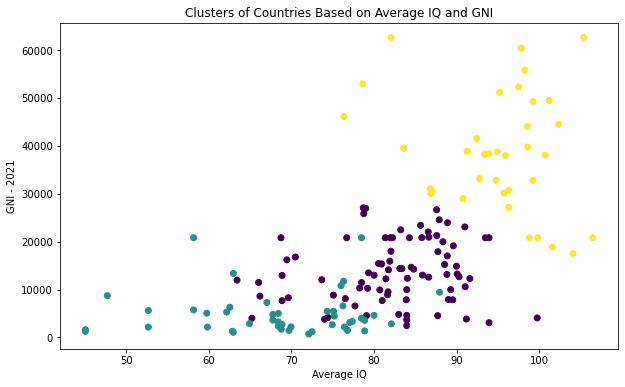

In [69]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10,6))
plt.scatter(df['Average IQ'], df[' GNI - 2021'], c=df['Cluster'])
plt.title('Clusters of Countries Based on Average IQ and GNI')
plt.xlabel('Average IQ')
plt.ylabel('GNI - 2021')
plt.show()

### Dimesionality Reduction 

In [71]:
# Define the features
features = df[['Average IQ', 'Literacy Rate', 'Nobel Prices', 'HDI (2021)', 'Mean years of schooling - 2021', ' GNI - 2021', 'Population - 2023']]

In [72]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [73]:
# Create a PCA instance
pca = PCA(n_components=2)

In [74]:
# Fit and transform the data
pca_features = pca.fit_transform(scaled_features)

In [75]:
# Print the shape of pca_features to check the number of features after dimensionality reduction
print(pca_features.shape)

(164, 2)


The output indicates that the dimensionality reduction was successful. The original dataset, which had multiple features (‘Average IQ’, ‘Literacy Rate’, ‘Nobel Prices’, ‘HDI (2021)’, ‘Mean years of schooling - 2021’, ‘GNI - 2021’, ‘Population - 2023’), has been reduced to just two principal components.

This means that the structure of the dataset has been preserved as much as possible, but the data is now represented in a lower-dimensional space, which can make subsequent analyses or visualizations simpler and more efficient.

### Conclusion 

Through various analyses including regression, classification, clustering, and dimensionality reduction, we’ve gained several insights from the ‘avgIQpercountry.csv’ dataset. We’ve seen how different machine learning models can predict the average IQ or the continent of a country based on various features. We’ve also observed how countries cluster together based on these features. Lastly, we’ve reduced the dimensionality of our dataset while preserving its structure as much as possible.